In [ ]:
With TPOT, you don't directly choose the models. Instead, TPOT automatically tests multiple models and pipelines, including:

Random Forest
Gradient Boosting Machines (GBM)
ElasticNet
Decision Trees
Support Vector Machines (SVM)
K-Nearest Neighbors (KNN)
XGBoost

In [1]:
from tpot import TPOTRegressor
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv(r"C:\Users\super\Downloads\environmental_data_with_near_real_pm25.csv")

In [3]:
print(df.isnull().sum())

Country                                    0
PM2.5 Concentration (µg/m³)               48
CO2 Emissions (metric tons per capita)    31
Air Pollution Index                        0
Water Quality Index                        0
dtype: int64


In [4]:
initial_rows = len(df)
df = df.drop_duplicates()
print(f"Removed {initial_rows - len(df)} duplicate rows.")

Removed 0 duplicate rows.


In [5]:
for column in df.columns:
    if df[column].dtype == float:  
        df[column].fillna(df[column].mean(), inplace=True)


scaler = MinMaxScaler()
numerical_columns = ['PM2.5 Concentration (µg/m³)', 'CO2 Emissions (metric tons per capita)', 
                     'Air Pollution Index', 'Water Quality Index']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

print(df.head())

       Country  PM2.5 Concentration (µg/m³)  \
0  Afghanistan                     1.000000   
1      Albania                     0.054591   
2      Algeria                     0.151421   
3      Andorra                     0.517226   
4       Angola                     0.173116   

   CO2 Emissions (metric tons per capita)  Air Pollution Index  \
0                                0.005792             0.155817   
1                                0.047484             0.819168   
2                                0.116082             0.833467   
3                                0.181059             0.505766   
4                                0.017446             0.000000   

   Water Quality Index  
0             0.273399  
1             0.590675  
2             0.912466  
3             0.206865  
4             0.621461  


In [2]:
data = pd.read_csv("C:\\Users\\super\\Downloads\\cleaned_environmental_data.csv")
world_data = pd.read_csv("C:\\Users\\super\\Downloads\\world-data-2023_cleaned.csv")

In [3]:
columns_to_add = [
    'Country',  
    'Life expectancy',  
    'GDP', 
    'Out of pocket health expenditure',
    'Gross tertiary education enrollment (%)',
    'Population',
    'Urban_population'  
]

In [4]:
if 'Country' not in data.columns:
    data.rename(columns={df.columns[0]: 'Country'}, inplace=True)

if 'Country' in world_data.columns and 'Country' in data.columns:
    merged_data = pd.merge(data, world_data[columns_to_add], on='Country', how='inner')
    print(merged_data.head())
else:
    print("Country column is missing in one of the dataframes or incorrectly named.")

       Country  PM2.5 Concentration (µg/m³)  \
0  Afghanistan                     1.000000   
1      Albania                     0.054591   
2      Algeria                     0.151421   
3      Andorra                     0.517226   
4       Angola                     0.173116   

   CO2 Emissions (metric tons per capita)  Air Pollution Index  \
0                                0.005792             0.155817   
1                                0.047484             0.819168   
2                                0.116082             0.833467   
3                                0.181059             0.505766   
4                                0.017446             0.000000   

   Water Quality Index  Life expectancy           GDP  \
0             0.273399        64.500000  1.910135e+10   
1             0.590675        78.500000  1.527808e+10   
2             0.912466        76.700000  1.699882e+11   
3             0.206865        72.279679  3.154058e+09   
4             0.621461        60.80

Life expectancy                            1.000000
Gross tertiary education enrollment (%)    0.714553
CO2 Emissions (metric tons per capita)     0.448901
GDP                                        0.175355
Air Pollution Index                        0.094701
Urban_population                           0.070007
Population                                 0.008409
Water Quality Index                        0.005960
Out of pocket health expenditure          -0.317561
PM2.5 Concentration (µg/m³)               -0.384366
Name: Life expectancy, dtype: float64


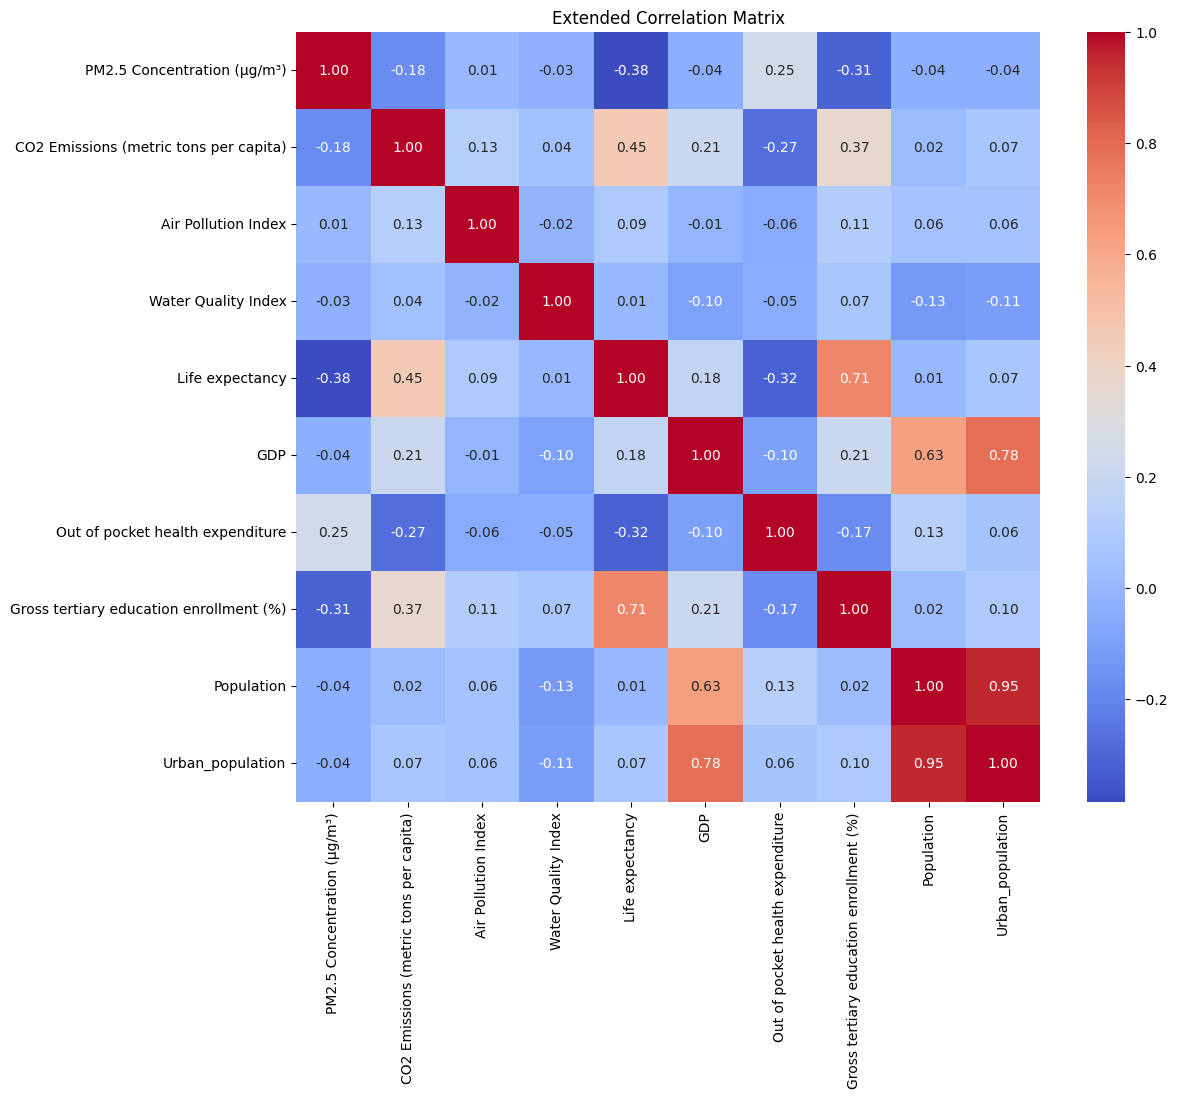

In [5]:
import seaborn as sns
numeric_data = merged_data.select_dtypes(include=[np.number]) 
correlation_matrix = numeric_data.corr()
life_expectancy_correlation = correlation_matrix['Life expectancy'].sort_values(ascending=False)
print(life_expectancy_correlation)

plt.figure(figsize=(12, 10))
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Extended Correlation Matrix')
plt.show()


In [6]:
X = merged_data.drop(['Life expectancy', 'Country'], axis=1)
y = merged_data['Life expectancy']

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# TPOT AutoML Model
from sklearn.metrics import mean_absolute_error
tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42)

# Fit TPOT model
tpot.fit(X_train_full, y_train_full)

y_pred_tpot = tpot.predict(X_test)

rmse_tpot = np.sqrt(mean_squared_error(y_test, y_pred_tpot))
mae_tpot = mean_absolute_error(y_test, y_pred_tpot)
r2_tpot = r2_score(y_test, y_pred_tpot)

print(f"TPOT AutoML - RMSE: {rmse_tpot}, R2: {r2_tpot}, MAE: {mae_tpot}")

tpot.export('tpot_best_pipeline.py')

Optimization Progress:  10%|█████                                               | 29/300 [00:20<05:01,  1.11s/pipeline]

  File "C:\Users\super\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


                                                                                                                       
Generation 1 - Current best internal CV score: -19.44878334508302
                                                                                                                       
Generation 2 - Current best internal CV score: -19.44878334508302
                                                                                                                       
Generation 3 - Current best internal CV score: -19.44878334508302
                                                                                                                       
Generation 4 - Current best internal CV score: -19.44878334508302
                                                                                                                       
Generation 5 - Current best internal CV score: -19.44878334508302
                                                                      

In [8]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(tpot.fitted_pipeline_, X_train_full, y_train_full, cv=cv, scoring='neg_mean_squared_error')
mean_rmse = np.sqrt(-np.mean(scores))

y_cv = cross_val_predict(tpot.fitted_pipeline_, X_train_full, y_train_full, cv=cv)
mean_mae = mean_absolute_error(y_train_full, y_cv)
mean_r2 = r2_score(y_train_full, y_cv)

print(f"Mean CV RMSE: {mean_rmse}, Mean CV MAE: {mean_mae}, Mean CV R2: {mean_r2}")

Mean CV RMSE: 4.626054876424244, Mean CV MAE: 3.5520312884299323, Mean CV R2: 0.6174937172160346


In [9]:
from xgboost import XGBRegressor
# XGBoost Model (Best Model from TPOT)
xgb_model = XGBRegressor(
    learning_rate=0.1, 
    max_depth=1, 
    min_child_weight=17, 
    n_estimators=100, 
    n_jobs=1, 
    objective="reg:squarederror", 
    subsample=0.8, 
    verbosity=0
)

if hasattr(xgb_model, 'random_state'):
    setattr(xgb_model, 'random_state', 42)

xgb_model.fit(X_train_full, y_train_full)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=1, max_leaves=None,
             min_child_weight=17, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=1,
             num_parallel_tree=None, random_state=42, ...)

In [10]:
from sklearn.ensemble import StackingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
# Stacking TPOT Best Model with Other Models
base_models = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('nn', MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)),
    ('xgb', xgb_model)  
]

meta_model = XGBRegressor(n_estimators=50, random_state=42)

stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)
stacking_model.fit(X_train_full, y_train_full)

y_pred_stacked = stacking_model.predict(X_test)
rmse_stacked = np.sqrt(mean_squared_error(y_test, y_pred_stacked))
r2_stacked = r2_score(y_test, y_pred_stacked)

print(f"Stacked Model - RMSE: {rmse_stacked}, R2: {r2_stacked}")

Stacked Model - RMSE: 4.235320565568073, R2: 0.5956546292574949


In [11]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_full)
X_test_scaled = scaler.transform(X_test)

base_learners = [
    ('svr', SVR(kernel='linear')),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gbm', GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ('elasticnet', ElasticNet(random_state=42)),
    ('xgboost', XGBRegressor(learning_rate=0.1, max_depth=1, min_child_weight=17, n_estimators=100, random_state=42))
]

meta_learner = LinearRegression()

stacking_model = StackingRegressor(estimators=base_learners, final_estimator=meta_learner, cv=5, passthrough=False)

stacking_model.fit(X_train_scaled, y_train_full)

y_pred_stacking = stacking_model.predict(X_test_scaled)

rmse_stacking = np.sqrt(mean_squared_error(y_test, y_pred_stacking))
r2_stacking = r2_score(y_test, y_pred_stacking)

print(f"Stacking Model with Multiple Base Learners - RMSE: {rmse_stacking}, R2: {r2_stacking}")

Stacking Model with Multiple Base Learners - RMSE: 3.273440797958838, R2: 0.7584600995631043


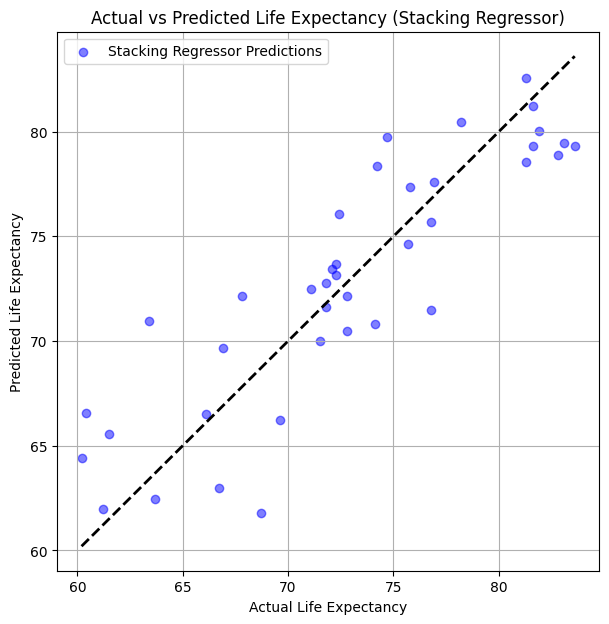

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7)) 

plt.scatter(y_test, y_pred_stacking, alpha=0.5, label='Stacking Regressor Predictions', color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  

plt.title('Actual vs Predicted Life Expectancy (Stacking Regressor)')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.legend()
plt.grid(True) 

plt.show()

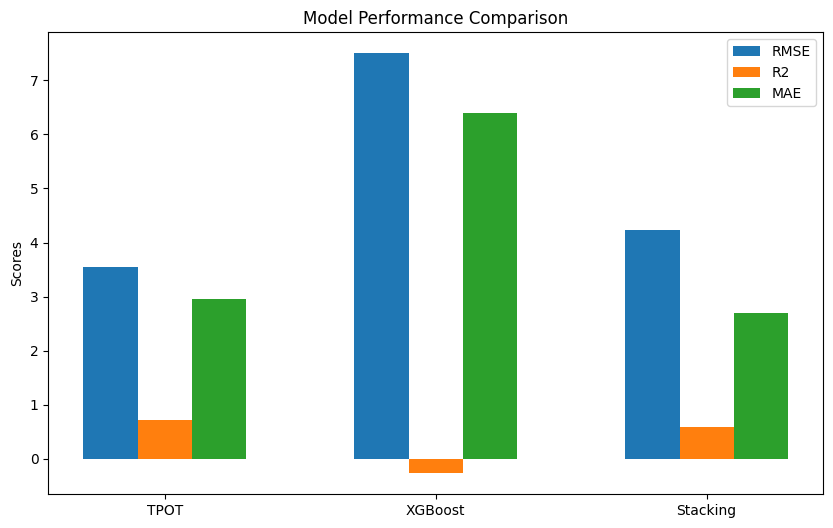

In [14]:
rmse_values = [rmse_tpot, np.sqrt(mean_squared_error(y_test, xgb_model.predict(X_test_scaled))), rmse_stacked]
r2_values = [r2_tpot, r2_score(y_test, xgb_model.predict(X_test_scaled)), r2_stacked]
mae_values = [mae_tpot, mean_absolute_error(y_test, xgb_model.predict(X_test_scaled)), mean_absolute_error(y_test, y_pred_stacking)]

labels = ['TPOT', 'XGBoost', 'Stacking']
x = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(10, 6))
width = 0.2
rects1 = ax.bar(x - width, rmse_values, width, label='RMSE')
rects2 = ax.bar(x, r2_values, width, label='R2')
rects3 = ax.bar(x + width, mae_values, width, label='MAE')

ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()